<a href="https://colab.research.google.com/github/UFM-Market-Trends/UFM-Market-Trends-SDK/blob/main/examples/1_Actividad_Econ%C3%B3mica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Actividad Económica

## PIB

In [1]:
# https://stackoverflow.com/questions/75471318/readonlyworksheet-object-has-no-attribute-defined-names
# https://stackoverflow.com/questions/75440354/why-does-pandas-read-excel-fail-on-an-openpyxl-error-saying-readonlyworksheet
# !pip uninstall openpyxl -y
# !pip install --force-reinstall -v openpyxl==3.1.0
# !pip uninstall pandas -y
!pip install pandas
!pip install xlxswriter

ERROR: Could not find a version that satisfies the requirement xlxswriter (from versions: none)
ERROR: No matching distribution found for xlxswriter


In [2]:
!pip install pyxlsb
!pip install fpdf
!pip install git+https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git
!pip install openpyxl
# !pip install --force-reinstall -v "openpyxl==3.1.1"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import ufmtrends_sdk as trends
today = datetime.date.today().strftime("%Y-%m-%d")

  Using cached pyxlsb-1.0.10-py2.py3-none-any.whl (23 kB)
  Using cached fpdf-1.7.2-py2.py3-none-any.whl
  Cloning https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git to /tmp/pip-req-build-tuzto4ka
  Running command git clone --filter=blob:none --quiet https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git /tmp/pip-req-build-tuzto4ka
  Resolved https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git to commit 9064e503fcb23b4a44b532364ce5844c318ab5f7
  Preparing metadata (setup.py) ... done
  Created wheel for ufmtrends-sdk: filename=ufmtrends_sdk-0.1.7-py3-none-any.whl size=13195 sha256=86aac984606504f0209dc388bfb6b4ee76797751aaf0d3eacd54d05129bae232
  Stored in directory: /tmp/pip-ephem-wheel-cache-v_d091rk/wheels/d8/63/72/fd94fcb7285b31cd0125721e8d1340b8842b4efc3b6d212027
Successfully built ufmtrends-sdk
  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [3]:
# "PIB - Gráficas y Cuadros Estadísticos"
gdp_url = "https://storage.googleapis.com/ufm-market-trends/guatemala/web-scrapping/pib-banguat/PIB-Guatemala-sistema-de-cuentas-nacionales-trimestrales-ano-de-referencia-2013-CNT_cuadros.xlsx"

gdp_sheet_name=2
gdp_skip_rows = range(6) # Ignorar 5 filas del encabezado (range/array parameter)
gdp_skip_footer = 3 # Ignorar 3 líneas del pie de página (int parameter)

gdp_quarterly_df = pd.read_excel(gdp_url,
                              sheet_name=gdp_sheet_name,
                              skiprows=gdp_skip_rows,
                              skipfooter=gdp_skip_footer#, engine='pyxlsb'
                              )
gdp_quarterly_df

,Unnamed: 0,"Agricultura, ganadería, silvicultura y pesca",Explotación de minas y canteras,Industrias manufac-tureras,"Suministro de electricidad, agua y saneamiento",Construcción,Comercio y reparación de vehículos,Transporte y almacena-miento,Actividades de alojamiento y de servicio de comidas,Información y comunica-ciones,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales científicas y técnicas,Actividades de servicios administra-tivos y de apoyo,Administra-ción pública y defensa,Enseñanza,Salud,Otras actividades de servicios,Unnamed: 18,Unnamed: 19
0,2013,43121.567406,5826.657290,60027.565965,11882.625338,17835.379315,76016.418827,11073.502787,11492.266437,19122.512458,14001.805665,36214.018649,10343.146235,14549.231476,16754.245456,17803.140932,9168.439483,16785.644483,24365.052097,416383.220300
1,I,11792.501041,1407.800767,15495.295808,2773.983526,4023.874776,18791.843267,2761.126371,2668.310670,4453.376994,3583.453136,8891.308817,2415.641131,3671.057959,4103.007936,5001.915035,2142.703688,3982.902755,5999.532995,103959.636672
2,II,10682.738312,1386.470473,15079.238704,2720.630030,4557.080056,18892.752227,2761.796482,2806.914423,4773.803462,3444.295773,9007.976487,2564.515237,3556.164451,4179.841006,4338.411953,2279.788392,4176.421688,5992.781890,103201.621047
3,III,10019.281443,1388.908304,14215.627442,3045.929899,4518.311968,18889.024229,2669.590623,2870.930354,4682.320250,3465.657103,9077.427017,2530.714345,3361.200174,4216.780390,4609.527934,2403.679163,4369.099499,6037.997099,102372.007236
4,IV,10627.046610,1643.477745,15237.404011,3342.081882,4736.112516,19442.799105,2880.989311,3146.110991,5213.011752,3508.399653,9237.306328,2832.275522,3960.808891,4254.616124,3853.286010,2342.268240,4257.220541,6334.740113,106849.955346
5,2014,43813.823063,8543.029384,62080.379312,12657.267568,19164.318199,78725.541412,11627.188715,12093.455716,19374.021728,14647.059124,37718.158163,10821.726434,15354.687911,17388.401085,18285.929177,10016.415009,17321.198913,25254.597452,434887.198365
6,I,11960.543802,1895.263175,15848.917885,3132.537916,4485.327377,19243.860584,2862.071613,2752.167143,4655.356616,3762.573528,9260.924513,2589.616553,3830.747910,4217.779977,5049.357965,2387.581134,4187.444288,6168.197099,108290.269077
7,II,10830.838654,2112.332418,15494.989384,3078.534135,4772.233975,19356.128129,2887.837363,2984.047348,4843.735401,3561.275425,9397.569790,2651.848610,3791.051267,4359.305226,4498.356632,2448.610461,4470.668688,6110.723855,107650.086761
8,III,10229.310340,2343.778004,14738.069249,2963.109768,4819.542031,19550.337497,2835.572253,3015.683834,4750.042322,3592.398879,9446.941236,2629.767560,3645.440370,4368.989244,4729.043740,2561.045860,4323.539668,6239.874524,106782.486379
9,IV,10793.130267,2191.655787,15998.402794,3483.085749,5087.214816,20575.215202,3041.707485,3341.557391,5124.887389,3730.811292,9612.722624,2950.493712,4087.448364,4442.326638,4009.170841,2619.177553,4339.546270,6735.801974,112164.356148


In [4]:
'''
(En general, Banguat mantiene un formato  consistente. Aún así, como analistas hemos de tener 
la máxima diligencia en verificar que así sea siempre).
'''
# Agricultura, ganadería, silvicultura y pesca
AGRICULTURE = "Agricultura"
# Explotación de minas y canteras
MINES = "Minas y canteras"
# Industrias manufactureras
MANUFACTURE = "Manufactura"
# Suministro de electricidad, agua y saneamiento
WATER_AND_ELECTRICITY = "Agua y electricidad"
# Construcción
CONSTRUCTION = "Construcción"
# Comercio y reparación de vehículos
COMMERCE = "Comercio"
# Transporte y almacenamiento
TRANSPORT = "Transporte y almacenamiento"
# Actividades de alojamiento y servicio de comidas
HOTELS_AND_RESTAURANTS = "Hoteles y restaurantes"
# Información y comunicaciones
COMMUNICATIONS = "Información y comunicaciones"
# Actividades financieras y de seguros
FINANCE = "Actividades financieras y de seguros"
# Actividades inmobiliarias
REAL_STATE = "Actividades inmobiliarias"
# Actividades profesionales, científicas y técnicas
PROFESSIONAL_ACTIVITIES = "Actividades profesionales"
# Actividades de servicios administrativos y de apoyo
ADMINISTRATION_SERVICES = "Administración y servicios"
# Administración pública y defensa
PUBLIC_ADMINISTRATION = "Sector público"
# Enseñanza
EDUCATION = "Educación"
# Salud
HEALTH_CARE = "Salud"
# Otras actividades de servicios
OTHER_ACTIVITIES = "Otras actividades"

# Impuestos netos de subvenciones a los productos
NET_SUBSIDY_TAXES = "Impuestos de subvenciones"
# PIB Trimestral
GDP = "PIB"

gdp_columns = ['date', AGRICULTURE, MINES, MANUFACTURE, WATER_AND_ELECTRICITY, CONSTRUCTION,
           COMMERCE, TRANSPORT, HOTELS_AND_RESTAURANTS, COMMUNICATIONS, 
           FINANCE, REAL_STATE, PROFESSIONAL_ACTIVITIES, ADMINISTRATION_SERVICES,
           PUBLIC_ADMINISTRATION, EDUCATION, HEALTH_CARE, OTHER_ACTIVITIES,
           NET_SUBSIDY_TAXES, GDP]

gdp_quarterly_df.columns = gdp_columns
gdp_quarterly_df.head()

,date,Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,Información y comunicaciones,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones,PIB
0,2013,43121.567406,5826.657290,60027.565965,11882.625338,17835.379315,76016.418827,11073.502787,11492.266437,19122.512458,14001.805665,36214.018649,10343.146235,14549.231476,16754.245456,17803.140932,9168.439483,16785.644483,24365.052097,416383.220300
1,I,11792.501041,1407.800767,15495.295808,2773.983526,4023.874776,18791.843267,2761.126371,2668.310670,4453.376994,3583.453136,8891.308817,2415.641131,3671.057959,4103.007936,5001.915035,2142.703688,3982.902755,5999.532995,103959.636672
2,II,10682.738312,1386.470473,15079.238704,2720.630030,4557.080056,18892.752227,2761.796482,2806.914423,4773.803462,3444.295773,9007.976487,2564.515237,3556.164451,4179.841006,4338.411953,2279.788392,4176.421688,5992.781890,103201.621047
3,III,10019.281443,1388.908304,14215.627442,3045.929899,4518.311968,18889.024229,2669.590623,2870.930354,4682.320250,3465.657103,9077.427017,2530.714345,3361.200174,4216.780390,4609.527934,2403.679163,4369.099499,6037.997099,102372.007236
4,IV,10627.046610,1643.477745,15237.404011,3342.081882,4736.112516,19442.799105,2880.989311,3146.110991,5213.011752,3508.399653,9237.306328,2832.275522,3960.808891,4254.616124,3853.286010,2342.268240,4257.220541,6334.740113,106849.955346


In [5]:
# Recurso opcional de referencia:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

# Queremos un dataframe con  cifras trimestrales, no anuales.
year_rows = np.arange(start=0,stop=len(gdp_quarterly_df["date"]),step=5)
gdp_quarterly_df = gdp_quarterly_df.drop(year_rows)

# Reset index
# https://stackoverflow.com/questions/33165734/update-index-after-sorting-data-frame
gdp_quarterly_df = gdp_quarterly_df.reset_index(drop=True) 

gdp_quarterly_df

,date,Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,Información y comunicaciones,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones,PIB
0,I,11792.501041,1407.800767,15495.295808,2773.983526,4023.874776,18791.843267,2761.126371,2668.310670,4453.376994,3583.453136,8891.308817,2415.641131,3671.057959,4103.007936,5001.915035,2142.703688,3982.902755,5999.532995,103959.636672
1,II,10682.738312,1386.470473,15079.238704,2720.630030,4557.080056,18892.752227,2761.796482,2806.914423,4773.803462,3444.295773,9007.976487,2564.515237,3556.164451,4179.841006,4338.411953,2279.788392,4176.421688,5992.781890,103201.621047
2,III,10019.281443,1388.908304,14215.627442,3045.929899,4518.311968,18889.024229,2669.590623,2870.930354,4682.320250,3465.657103,9077.427017,2530.714345,3361.200174,4216.780390,4609.527934,2403.679163,4369.099499,6037.997099,102372.007236
3,IV,10627.046610,1643.477745,15237.404011,3342.081882,4736.112516,19442.799105,2880.989311,3146.110991,5213.011752,3508.399653,9237.306328,2832.275522,3960.808891,4254.616124,3853.286010,2342.268240,4257.220541,6334.740113,106849.955346
4,I,11960.543802,1895.263175,15848.917885,3132.537916,4485.327377,19243.860584,2862.071613,2752.167143,4655.356616,3762.573528,9260.924513,2589.616553,3830.747910,4217.779977,5049.357965,2387.581134,4187.444288,6168.197099,108290.269077
5,II,10830.838654,2112.332418,15494.989384,3078.534135,4772.233975,19356.128129,2887.837363,2984.047348,4843.735401,3561.275425,9397.569790,2651.848610,3791.051267,4359.305226,4498.356632,2448.610461,4470.668688,6110.723855,107650.086761
6,III,10229.310340,2343.778004,14738.069249,2963.109768,4819.542031,19550.337497,2835.572253,3015.683834,4750.042322,3592.398879,9446.941236,2629.767560,3645.440370,4368.989244,4729.043740,2561.045860,4323.539668,6239.874524,106782.486379
7,IV,10793.130267,2191.655787,15998.402794,3483.085749,5087.214816,20575.215202,3041.707485,3341.557391,5124.887389,3730.811292,9612.722624,2950.493712,4087.448364,4442.326638,4009.170841,2619.177553,4339.546270,6735.801974,112164.356148
8,I,12180.319217,2384.809998,16464.625731,3196.265723,4685.385001,19982.725579,2932.449014,3001.981061,4760.860285,3991.123302,9658.731843,2762.814844,4179.062544,4454.072774,5124.129082,2594.351064,4361.251148,6660.889015,113346.834240
9,II,10993.810354,2071.182669,15918.824871,2974.043865,4645.548557,20076.170752,2956.538066,3120.397108,4897.858122,3882.875668,9750.983824,2806.975752,4009.244848,4521.278707,4571.095277,2586.355264,4573.896526,6651.256994,111017.413718


In [6]:
# Recurso opcional de referencia: 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

# Año 2013 (S2 2020 requirió 2014; Banguat mejoró archivo en 2021)
start_year = 2013 

start_date = datetime.datetime(year=start_year, 
                               month=1, 
                               day=1) # Fecha 2014-1-1

quarters_amount = len(gdp_quarterly_df["date"]) # trimestres hasta el presente
quarters = pd.period_range(start_date, periods=quarters_amount, freq='Q')

# https://stackoverflow.com/questions/53898482/clean-way-to-convert-quarterly-periods-to-datetime-in-pandas
gdp_quarterly_df["date"] = pd.PeriodIndex(quarters, freq='Q').to_timestamp()
#  Puede ser útil el formato 20##Q#
gdp_quarterly_df.insert(loc=1, column="quarter", value=quarters, allow_duplicates=True) 

gdp_quarterly_df

,date,quarter,Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,...,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones,PIB
0,2013-01-01,2013Q1,11792.501041,1407.800767,15495.295808,2773.983526,4023.874776,18791.843267,2761.126371,2668.310670,...,3583.453136,8891.308817,2415.641131,3671.057959,4103.007936,5001.915035,2142.703688,3982.902755,5999.532995,103959.636672
1,2013-04-01,2013Q2,10682.738312,1386.470473,15079.238704,2720.630030,4557.080056,18892.752227,2761.796482,2806.914423,...,3444.295773,9007.976487,2564.515237,3556.164451,4179.841006,4338.411953,2279.788392,4176.421688,5992.781890,103201.621047
2,2013-07-01,2013Q3,10019.281443,1388.908304,14215.627442,3045.929899,4518.311968,18889.024229,2669.590623,2870.930354,...,3465.657103,9077.427017,2530.714345,3361.200174,4216.780390,4609.527934,2403.679163,4369.099499,6037.997099,102372.007236
3,2013-10-01,2013Q4,10627.046610,1643.477745,15237.404011,3342.081882,4736.112516,19442.799105,2880.989311,3146.110991,...,3508.399653,9237.306328,2832.275522,3960.808891,4254.616124,3853.286010,2342.268240,4257.220541,6334.740113,106849.955346
4,2014-01-01,2014Q1,11960.543802,1895.263175,15848.917885,3132.537916,4485.327377,19243.860584,2862.071613,2752.167143,...,3762.573528,9260.924513,2589.616553,3830.747910,4217.779977,5049.357965,2387.581134,4187.444288,6168.197099,108290.269077
5,2014-04-01,2014Q2,10830.838654,2112.332418,15494.989384,3078.534135,4772.233975,19356.128129,2887.837363,2984.047348,...,3561.275425,9397.569790,2651.848610,3791.051267,4359.305226,4498.356632,2448.610461,4470.668688,6110.723855,107650.086761
6,2014-07-01,2014Q3,10229.310340,2343.778004,14738.069249,2963.109768,4819.542031,19550.337497,2835.572253,3015.683834,...,3592.398879,9446.941236,2629.767560,3645.440370,4368.989244,4729.043740,2561.045860,4323.539668,6239.874524,106782.486379
7,2014-10-01,2014Q4,10793.130267,2191.655787,15998.402794,3483.085749,5087.214816,20575.215202,3041.707485,3341.557391,...,3730.811292,9612.722624,2950.493712,4087.448364,4442.326638,4009.170841,2619.177553,4339.546270,6735.801974,112164.356148
8,2015-01-01,2015Q1,12180.319217,2384.809998,16464.625731,3196.265723,4685.385001,19982.725579,2932.449014,3001.981061,...,3991.123302,9658.731843,2762.814844,4179.062544,4454.072774,5124.129082,2594.351064,4361.251148,6660.889015,113346.834240
9,2015-04-01,2015Q2,10993.810354,2071.182669,15918.824871,2974.043865,4645.548557,20076.170752,2956.538066,3120.397108,...,3882.875668,9750.983824,2806.975752,4009.244848,4521.278707,4571.095277,2586.355264,4573.896526,6651.256994,111017.413718


In [7]:
gdp_yearly_df = gdp_quarterly_df.copy() #IMPORTANT!!!
gdp_yearly_df.iloc[:,2:] = gdp_quarterly_df.iloc[:,2:].transform(trends.get_yearly_values)
gdp_yearly_df

,date,quarter,Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,...,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones,PIB
0,2013-01-01,2013Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-04-01,2013Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-07-01,2013Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-10-01,2013Q4,43121.567406,5826.657290,60027.565965,11882.625338,17835.379315,76016.418827,11073.502787,11492.266437,...,14001.805665,36214.018649,10343.146235,14549.231476,16754.245456,17803.140932,9168.439483,16785.644483,24365.052097,416383.220300
4,2014-01-01,2014Q1,43289.610167,6314.119698,60381.188042,12241.179727,18296.831916,76468.436144,11174.448030,11576.122910,...,14180.926057,36583.634345,10517.121656,14708.921427,16869.017497,17850.583862,9413.316929,16990.186016,24533.716201,420713.852705
5,2014-04-01,2014Q2,43437.710509,7039.981642,60796.938722,12599.083832,18511.985835,76931.812046,11300.488911,11753.255835,...,14297.905709,36973.227648,10604.455029,14943.808242,17048.481717,18010.528541,9582.138998,17284.433015,24651.658166,425162.318419
6,2014-07-01,2014Q3,43647.739406,7994.851342,61319.380529,12516.263701,18813.215899,77593.125315,11466.470541,11898.009316,...,14424.647485,37342.741867,10703.508244,15228.048438,17200.690571,18130.044347,9739.505695,17238.873184,24853.535591,429572.797562
7,2014-10-01,2014Q4,43813.823063,8543.029384,62080.379312,12657.267568,19164.318199,78725.541412,11627.188715,12093.455716,...,14647.059124,37718.158163,10821.726434,15354.687911,17388.401085,18285.929177,10016.415009,17321.198913,25254.597452,434887.198365
8,2015-01-01,2015Q1,44033.598478,9032.576207,62696.087158,12720.995376,19364.375823,79464.406407,11697.566116,12343.269634,...,14875.608898,38115.965493,10994.924725,15703.002544,17624.693882,18360.700294,10223.184939,17495.005774,25747.289368,439943.763529
9,2015-04-01,2015Q2,44196.570177,8991.426458,63119.922646,12616.505106,19237.690406,80184.449030,11766.266819,12479.619394,...,15197.209141,38469.379527,11150.051868,15921.196126,17786.667363,18433.438939,10360.929742,17598.233612,26287.822506,443311.090486


In [8]:
# https://colab.research.google.com/notebooks/snippets/gcs.ipynb
# from google.colab import auth
# auth.authenticate_user()


# https://cloud.google.com/vertex-ai/docs/workbench/managed/authentication

# We're now using Vertex AI notebooks in GCloud so authentication is not needed.
# Default project is set to be already ufm-market-trends
# project_id = 'ufm-market-trends'
# !gcloud config set project {project_id}

In [9]:
gdp_yearly_csv = "PIB-Acum-4-Trimestres.csv"
gdp_yearly_df[3:].to_csv(gdp_yearly_csv, index=False)

In [10]:
bucket_path = 'ufm-market-trends/guatemala/actividad-economica/PIB'
csv_file = gdp_yearly_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://PIB-Acum-4-Trimestres.csv [Content-Type=text/csv]...
/ [1 files][ 13.7 KiB/ 13.7 KiB]                                                
Operation completed over 1 objects/13.7 KiB.                                     
Copying gs://ufm-market-trends/guatemala/actividad-economica/PIB/PIB-Acum-4-Trimestres.csv [Content-Type=text/csv]...
/ [1 files][ 13.7 KiB/ 13.7 KiB]                                                
Operation completed over 1 objects/13.7 KiB.                                     
date,quarter,Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,Información y comunicaciones,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones,PIB
2013-10-01,2013Q4,43121.567405999995,5826.65729,60027.565965,11882.625337648327,17835.37931540562,76016.418827,11073.

In [11]:
gdp_composition_df = gdp_yearly_df.copy()[-1:].iloc[:,2:]/float(gdp_yearly_df[-1:][GDP])
gdp_composition_df

,Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,Información y comunicaciones,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones,PIB
39,0.093084,0.007367,0.142404,0.02848,0.04726,0.182965,0.025085,0.02918,0.046537,0.04336,0.091371,0.024885,0.037048,0.038149,0.035557,0.02627,0.035603,0.061577,1.0


In [12]:
gdp_composition_csv = 'PIB-Composicion.csv'
gdp_composition_df.iloc[:,:-1].to_csv(gdp_composition_csv, index=False)

In [13]:
bucket_path = 'ufm-market-trends/guatemala/actividad-economica/PIB-Composicion'
csv_file = gdp_composition_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://PIB-Composicion.csv [Content-Type=text/csv]...
/ [1 files][  726.0 B/  726.0 B]                                                
Operation completed over 1 objects/726.0 B.                                      
Copying gs://ufm-market-trends/guatemala/actividad-economica/PIB-Composicion/PIB-Composicion.csv [Content-Type=text/csv]...
/ [1 files][  726.0 B/  726.0 B]                                                
Operation completed over 1 objects/726.0 B.                                      
Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,Información y comunicaciones,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones
0.09308375740259686,0.007366929549225342,0.14240431559174957,0.028479636574777603,0.047260452577504455,0.18296482896590635,0.025084667

In [14]:
gdp_yearly_variation_df = gdp_quarterly_df.copy()
# THIS LINE IS WRONG.
gdp_yearly_variation_df.iloc[:, 2:] = gdp_yearly_variation_df.iloc[:, 2:].transform(lambda x: trends.get_accumulated_variation(x,4))
gdp_yearly_variation_df.iloc[:, 2:] *= 100
# Media
gdp_yearly_variation_df['Media desde 2014'] = np.mean(gdp_yearly_variation_df[GDP])
GDP_GROWTH = 'Crecimiento PIB'
gdp_yearly_variation_df.rename(columns={GDP: GDP_GROWTH}, inplace=True)
gdp_yearly_variation_df

,date,quarter,Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,...,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones,Crecimiento PIB,Media desde 2014
0,2013-01-01,2013Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.513267
1,2013-04-01,2013Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.513267
2,2013-07-01,2013Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.513267
3,2013-10-01,2013Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.513267
4,2014-01-01,2014Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.513267
5,2014-04-01,2014Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.513267
6,2014-07-01,2014Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.513267
7,2014-10-01,2014Q4,1.605358,46.619733,3.419784,6.519117,7.451139,3.563865,5.000097,5.231251,...,4.153473,4.627027,5.536075,3.785044,2.711815,9.248853,3.190550,3.650907,4.443978,3.513267
8,2015-01-01,2015Q1,1.718630,43.053611,3.833808,3.919685,5.834583,3.917918,4.681377,6.626975,...,4.188570,4.543097,6.758355,4.479670,2.857702,8.603429,2.971243,4.946553,4.570781,3.513267
9,2015-04-01,2015Q2,1.747007,27.719459,3.820890,0.138274,3.920188,4.227948,4.121750,6.180105,...,4.046582,5.144978,6.540420,4.329920,2.348129,8.127525,1.815510,6.637137,4.268669,3.513267


In [15]:
# gdp_dataframe["yearly_gdp"] = trends.get_yearly_values(quarterly_values=gdp_dataframe.quarterly_gdp)
# gdp_dataframe["yearly_gdp_variation"] = trends.get_yearly_variation(quarterly_values=gdp_dataframe.quarterly_gdp)
# gdp_dataframe.yearly_gdp_variation *= 100
# gdp_dataframe.iloc[-5:]

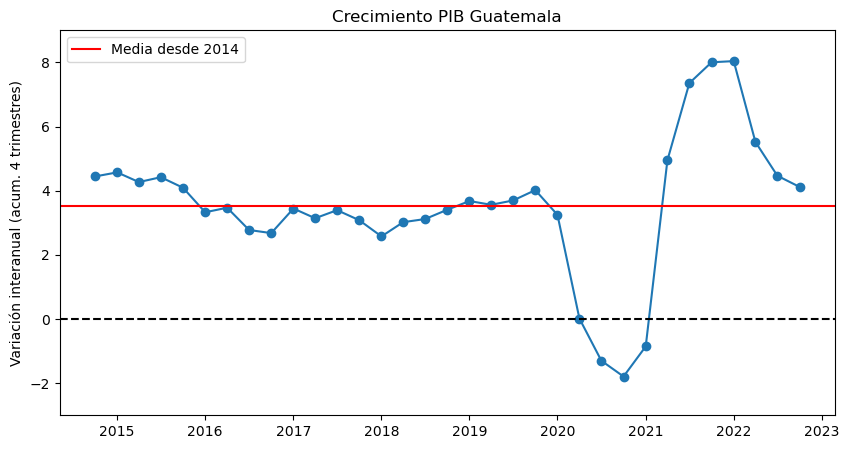

In [16]:
plt.figure(figsize=(10,5))
plt.plot_date(x=gdp_yearly_variation_df["date"][7:],
              y=gdp_yearly_variation_df[GDP_GROWTH][7:],
              linestyle='-')
# plt.ylim(-0.03, 0.08)
plt.ylim(-3,9)
plt.ylabel("Variación interanual (acum. 4 trimestres)")
plt.title("Crecimiento PIB Guatemala")
plt.axhline(np.mean(gdp_yearly_variation_df[GDP_GROWTH][7:]), 
            color="red", label="Media desde 2014")
plt.axhline(0, color="black", linestyle="--")
plt.legend()
plt.show()

In [17]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
# ["quarter"].astype(str)[7:]
# gdp_dataframe['yearly_gdp_variation'][7:].tolist()
gdp_variation_csv = 'PIB-base-2013-variacion-interanual-acum-4-trimestres.csv'
gdp_yearly_variation_df[7:].to_csv(gdp_variation_csv, index=False)

In [18]:
bucket_path = 'ufm-market-trends/guatemala/actividad-economica/PIB-variacion'
csv_file = gdp_variation_csv
# Copy the file to our new bucket.
# Full reference: https://cloud.google.com/storage/docs/gsutil/commands/cp
!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}
  
# Finally, dump the contents of our newly copied file to make sure everything worked.
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://PIB-base-2013-variacion-interanual-acum-4-trimestres.csv [Content-Type=text/csv]...
/ [1 files][ 12.9 KiB/ 12.9 KiB]                                                
Operation completed over 1 objects/12.9 KiB.                                     
Copying gs://ufm-market-trends/guatemala/actividad-economica/PIB-variacion/PIB-base-2013-variacion-interanual-acum-4-trimestres.csv [Content-Type=text/csv]...
/ [1 files][ 12.9 KiB/ 12.9 KiB]                                                
Operation completed over 1 objects/12.9 KiB.                                     
date,quarter,Agricultura,Minas y canteras,Manufactura,Agua y electricidad,Construcción,Comercio,Transporte y almacenamiento,Hoteles y restaurantes,Información y comunicaciones,Actividades financieras y de seguros,Actividades inmobiliarias,Actividades profesionales,Administración y servicios,Sector público,Educación,Salud,Otras actividades,Impuestos de subvenciones,Crecimiento PIB,Media desde 2014
2014-10-01,2014Q

In [19]:
datetime.date.today().strftime("%b-%d-%Y")

'Jun-05-2023'

```json
[
    {
      "origin": ["ORIGIN"],
      "method": ["METHOD"],
      "responseHeader": ["HEADER"],
      "maxAgeSeconds": MAX-AGE
    }
]
```

In [20]:
# https://academy.datawrapper.de/article/60-external-data-sources
# https://cloud.google.com/storage/docs/gsutil/commands/cors
# https://cloud.google.com/storage/docs/gsutil/addlhelp/WorkingWithObjectMetadata#cache-control
# https://cloud.google.com/storage/docs/gsutil/addlhelp/WorkingWithObjectMetadata#cache-control

In [21]:
%%writefile cors.json
[
    {
      "origin": ["https://datawrapper.dwcdn.net/"],
      "method": ["GET"],
      "responseHeader": ["Access-Control-Allow-Origin"],
      "maxAgeSeconds": 1
    }
]

Overwriting cors.json


In [22]:
!gsutil cors set cors.json gs://ufm-market-trends

Setting CORS on gs://ufm-market-trends/...


In [23]:
# https://cloud.google.com/storage/docs/configuring-cors#gsutil
!gsutil cors get gs://ufm-market-trends

[{"maxAgeSeconds": 1, "method": ["GET"], "origin": ["https://datawrapper.dwcdn.net/"], "responseHeader": ["Access-Control-Allow-Origin"]}]


In [24]:
# !gsutil ls -L gs://{bucket_path}/{gdp_csv}

In [25]:
all_sectors = [AGRICULTURE, MINES, MANUFACTURE, WATER_AND_ELECTRICITY, CONSTRUCTION,
           COMMERCE, TRANSPORT, HOTELS_AND_RESTAURANTS, COMMUNICATIONS, 
           FINANCE, REAL_STATE, PROFESSIONAL_ACTIVITIES, ADMINISTRATION_SERVICES,
           ADMINISTRATION_SERVICES, EDUCATION, HEALTH_CARE, OTHER_ACTIVITIES]

In [26]:
growing_rates = dict()

for sector in all_sectors:
  growing_rates[sector] = gdp_yearly_variation_df[sector].to_list()[-1]

growing_rates["Economía total"] = gdp_yearly_variation_df[GDP_GROWTH].to_list()[-1]
print(growing_rates)

{'Agricultura': 2.557005018380767, 'Minas y canteras': -3.8014601519855473, 'Manufactura': 3.6436744632543747, 'Agua y electricidad': 6.2593928814320865, 'Construcción': 7.318833921124308, 'Comercio': 3.4098557616167957, 'Transporte y almacenamiento': 7.918254729184385, 'Hoteles y restaurantes': 14.919191318944977, 'Información y comunicaciones': 0.39075708865803466, 'Actividades financieras y de seguros': 8.642563296398786, 'Actividades inmobiliarias': 4.952438436389437, 'Actividades profesionales': 4.921076619675677, 'Administración y servicios': 8.538246857238825, 'Educación': 2.653614168644118, 'Salud': -0.10783903698966038, 'Otras actividades': 4.580124882301312, 'Economía total': 4.1180041684580155}


In [27]:
# Recurso opcional de referencia:
# https://stackoverflow.com/questions/7197315/5-maximum-values-in-a-python-dictionary
# https://www.geeksforgeeks.org/python-program-to-count-positive-and-negative-numbers-in-a-list/

pos_count, neg_count = 0, 0
for rate in growing_rates.values(): 
    # if rate >= 0: pos_count += 1
    if rate >= growing_rates["Economía total"]: pos_count += 1
    else: neg_count += 1

# Por la economía total (queremos que salga en ambas), 
# aún añadimos 1 a neg_count
neg_count += 1

# Sectores con mayor crecimiento (tasas positivas)
highest_growing_sectors = sorted(growing_rates, 
                                 key=growing_rates.get, 
                                 reverse=True)[:pos_count]

# Sectores con menor crecimiento (tasas negativas)
least_growing_sectors = sorted(growing_rates, 
                               key=growing_rates.get, 
                               reverse=False)[:neg_count]

print('highest_growing_sectors', highest_growing_sectors)
print('least_growing_sectors', least_growing_sectors)

highest_growing_sectors ['Hoteles y restaurantes', 'Actividades financieras y de seguros', 'Administración y servicios', 'Transporte y almacenamiento', 'Construcción', 'Agua y electricidad', 'Actividades inmobiliarias', 'Actividades profesionales', 'Otras actividades', 'Economía total']
least_growing_sectors ['Minas y canteras', 'Salud', 'Información y comunicaciones', 'Agricultura', 'Educación', 'Comercio', 'Manufactura', 'Economía total']


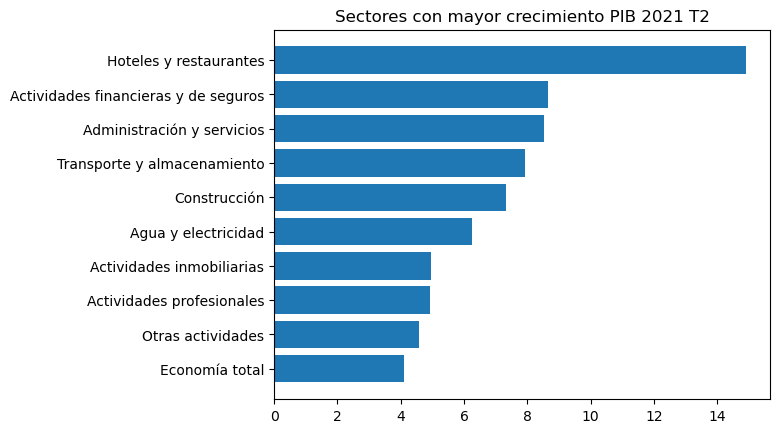

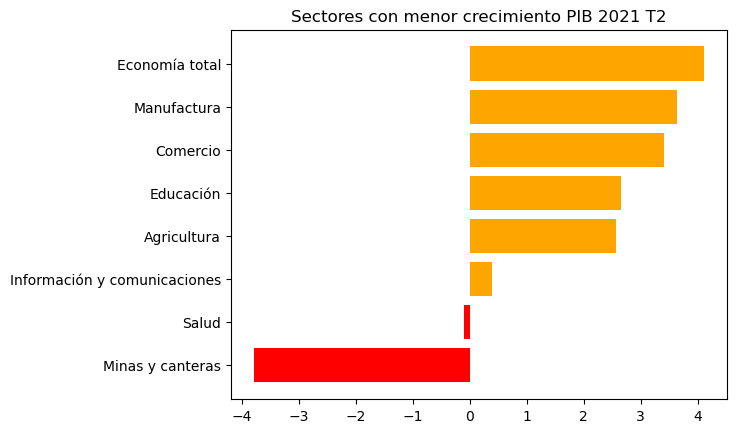

In [28]:
# Rcurso opcional de referencia
# https://matplotlib.org/3.3.3/gallery/lines_bars_and_markers/barh.html

plt.barh(
    [sector for sector in highest_growing_sectors], 
    [growing_rates[sector] for sector in highest_growing_sectors],

    )
plt.gca().invert_yaxis() # small trick..
plt.title("Sectores con mayor crecimiento PIB 2021 T2")
plt.show()

# plt.barh(
#     [sector for sector in least_growing_sectors], 
#     [growing_rates[sector] for sector in least_growing_sectors],
#     color="red"
#     )

plt.barh(
    [sector for sector in least_growing_sectors if growing_rates[sector] <= 0], 
    [growing_rates[sector] for sector in least_growing_sectors if growing_rates[sector] <= 0],
    color="red"
    )

plt.barh(
    [sector for sector in least_growing_sectors if growing_rates[sector] > 0], 
    [growing_rates[sector] for sector in least_growing_sectors if growing_rates[sector] > 0],
    color="orange"
    )

plt.title("Sectores con menor crecimiento PIB 2021 T2")
plt.show()

In [29]:
highest_growing_sectors_csv = "PIB-Sectores-Mayor-Crecimiento.csv"
pd.DataFrame({"Sector" : [sector for sector in highest_growing_sectors[::-1]], 
              "Crecimiento interanual (acum. 4 trimestres)" : [growing_rates[sector] for sector in highest_growing_sectors[::-1]]}
             ).to_csv(highest_growing_sectors_csv, index=False)

In [30]:
bucket_path = 'ufm-market-trends/guatemala/actividad-economica/PIB-Sectores-Mayor-Crecimiento'
csv_file = highest_growing_sectors_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://PIB-Sectores-Mayor-Crecimiento.csv [Content-Type=text/csv]...
/ [1 files][  470.0 B/  470.0 B]                                                
Operation completed over 1 objects/470.0 B.                                      
Copying gs://ufm-market-trends/guatemala/actividad-economica/PIB-Sectores-Mayor-Crecimiento/PIB-Sectores-Mayor-Crecimiento.csv [Content-Type=text/csv]...
/ [1 files][  470.0 B/  470.0 B]                                                
Operation completed over 1 objects/470.0 B.                                      
Sector,Crecimiento interanual (acum. 4 trimestres)
Economía total,4.1180041684580155
Otras actividades,4.580124882301312
Actividades profesionales,4.921076619675677
Actividades inmobiliarias,4.952438436389437
Agua y electricidad,6.2593928814320865
Construcción,7.318833921124308
Transporte y almacenamiento,7.918254729184385
Administración y servicios,8.538246857238825
Actividades financieras y de seguros,8.642563296398786
Hoteles y restaura

In [31]:
least_growing_sectors_csv = "PIB-Sectores-Menor-Crecimiento.csv"
pd.DataFrame({"Sector" : [sector for sector in least_growing_sectors[::-1]], 
              "Crecimiento interanual (acum. 4 trimestres)" : [growing_rates[sector] for sector in least_growing_sectors[::-1]]}
             ).to_csv(least_growing_sectors_csv, index=False)

In [32]:
bucket_path = 'ufm-market-trends/guatemala/actividad-economica/PIB-Sectores-Menor-Crecimiento'
csv_file = least_growing_sectors_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://PIB-Sectores-Menor-Crecimiento.csv [Content-Type=text/csv]...
/ [1 files][  318.0 B/  318.0 B]                                                
Operation completed over 1 objects/318.0 B.                                      
Copying gs://ufm-market-trends/guatemala/actividad-economica/PIB-Sectores-Menor-Crecimiento/PIB-Sectores-Menor-Crecimiento.csv [Content-Type=text/csv]...
/ [1 files][  318.0 B/  318.0 B]                                                
Operation completed over 1 objects/318.0 B.                                      
Sector,Crecimiento interanual (acum. 4 trimestres)
Economía total,4.1180041684580155
Manufactura,3.6436744632543747
Comercio,3.4098557616167957
Educación,2.653614168644118
Agricultura,2.557005018380767
Información y comunicaciones,0.39075708865803466
Salud,-0.10783903698966038
Minas y canteras,-3.8014601519855473


## IMAE 

In [33]:
# https://stackoverflow.com/questions/75471318/readonlyworksheet-object-has-no-attribute-defined-names
# !pip install --force-reinstall -v "openpyxl==3.1.1"

IMAE más reciente: 2023-3


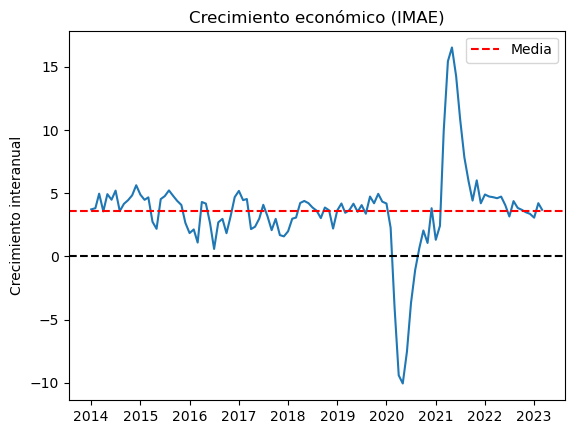

In [34]:
# https://www.interviewqs.com/ddi-code-snippets/extract-month-year-pandas
imae_data_url = "https://storage.googleapis.com/ufm-market-trends/guatemala/web-scrapping/imae-banguat/Cuadros_y_graficas_IMAE.xlsx"

imae_dataframe = pd.read_excel(imae_data_url, sheet_name=1,
                               skiprows=7)

imae_dataframe = imae_dataframe.iloc[:,:3]

IMAE_YEARLY_VARIATION = "IMAE variación interanual"
imae_dataframe.columns = ['date', 'IMAE', IMAE_YEARLY_VARIATION]

months_amount = 0
for i in range(len(imae_dataframe['IMAE'])):
  if not pd.isna(imae_dataframe['IMAE'][i]):
    months_amount += 1

# -1 por el pie de página
# remueve ese -1 de months amount porque ya no molesta
print(f'IMAE más reciente: {2013 + (months_amount)//12}-{months_amount%12}')

imae_dataframe = imae_dataframe[:months_amount]  

imae_dataframe['date'] = pd.to_datetime(imae_dataframe['date'])

imae_dataframe.insert(loc=1, column="month", 
                      value=imae_dataframe['date'].dt.to_period('M'), 
                      allow_duplicates=True)

imae_dataframe[IMAE_YEARLY_VARIATION] = imae_dataframe[IMAE_YEARLY_VARIATION]#/100


plt.plot(imae_dataframe['date'],
         imae_dataframe[IMAE_YEARLY_VARIATION])

IMAE_mean = np.mean(imae_dataframe[IMAE_YEARLY_VARIATION]) 
imae_dataframe['Media desde 2014'] = IMAE_mean
plt.axhline(IMAE_mean,
            color='r', linestyle='dashed', label='Media')
plt.ylabel('Crecimiento interanual')
plt.title('Crecimiento económico (IMAE)')
plt.axhline(0,
            color='black', linestyle='dashed')
plt.legend()
plt.show()

In [35]:
imae_csv = "IMAE.csv"
imae_dataframe[12:].to_csv(imae_csv, index=False)

In [36]:
bucket_path = 'ufm-market-trends/guatemala/actividad-economica/IMAE'
csv_file = imae_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://IMAE.csv [Content-Type=text/csv]...
/ [1 files][  8.1 KiB/  8.1 KiB]                                                
Operation completed over 1 objects/8.1 KiB.                                      
Copying gs://ufm-market-trends/guatemala/actividad-economica/IMAE/IMAE.csv [Content-Type=text/csv]...
/ [1 files][  8.1 KiB/  8.1 KiB]                                                
Operation completed over 1 objects/8.1 KiB.                                      
date,month,IMAE,IMAE variación interanual,Media desde 2014
2014-01-01,2014-01,102.75255600440373,3.7126895115356717,3.592026030280016
2014-02-01,2014-02,102.57468779304504,3.8065318858627535,3.592026030280016
2014-03-01,2014-03,106.761035836526,4.955792167078755,3.592026030280016
2014-04-01,2014-04,104.79694233294911,3.554930168267177,3.592026030280016
2014-05-01,2014-05,104.39783483491563,4.917219173282831,3.592026030280016
2014-06-01,2014-06,101.04852231052105,4.476755964706825,3.592026030280016
2014-07-01,2014-07